https://otexts.com/fpp2/intro.html

## Stationarity

- A stationary time series is one whose properties do not depend on the time at which the series is observed
- Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. 
- On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.


- Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

- In general, a stationary time series will have no predictable patterns in the long-term. 
- Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

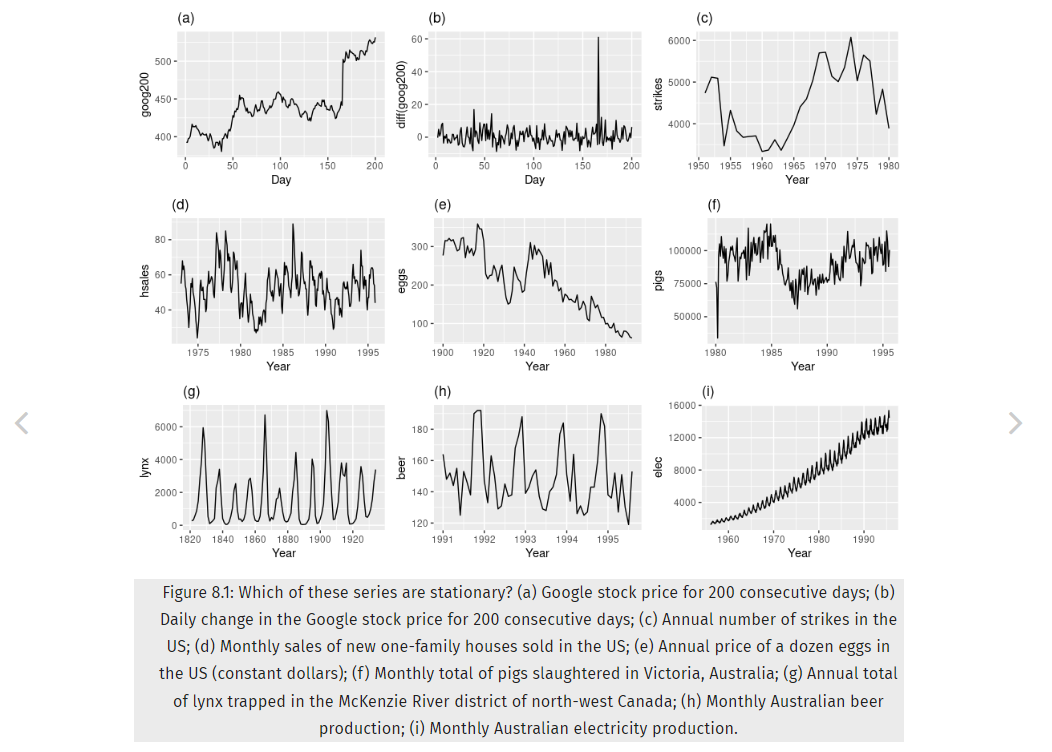

- Obvious seasonality rules out series (d), (h) and (i).
- Trends and changing levels rules out series (a), (c), (e), (f) and (i). 
- Increasing variance also rules out (i). That leaves only (b) and (g) as stationary series.




<AxesSubplot:xlabel='DATE'>

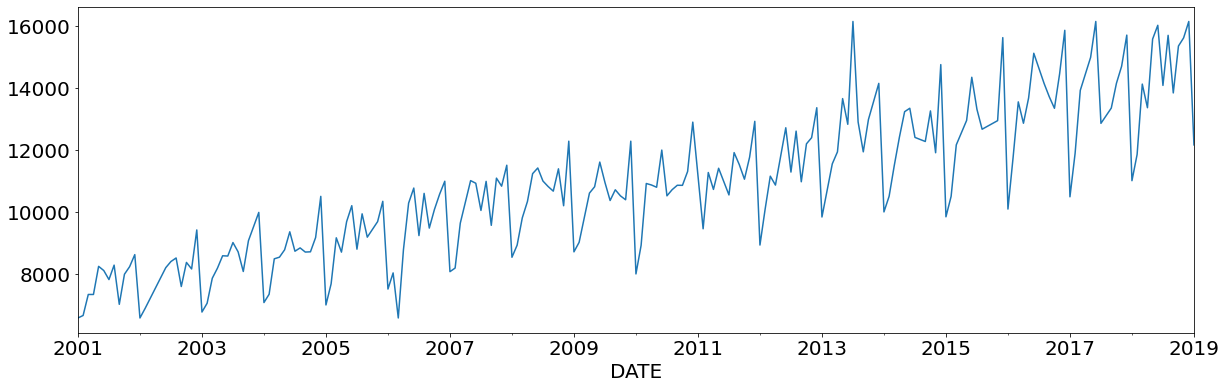

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)


import matplotlib
matplotlib.rcParams.update({'font.size': 20})

mobile_sales = pd.read_excel('mobilesales.xlsx')

mobile_sales.set_index("DATE",inplace=True)

mobile_sales["Sales"] = mobile_sales["Sales"].interpolate(method="linear",)
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

mobile_sales.Sales.plot()

### Dickey-Fuller Test of Stationarity : 

In [3]:
import statsmodels.api as sm

In [4]:
# Augmented Dickey-Fuller unit root test.
sm.tsa.stattools.adfuller

<function statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)>

In [5]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)

(0.32893103668316,
 0.9786335779042278,
 12,
 204,
 {'1%': -3.462818103072159,
  '5%': -2.8758145932936805,
  '10%': -2.574378674548251},
 3264.0668027222423)

    Returns
    -------
    adf : float
        The test statistic.
    pvalue : float
        MacKinnon"s approximate p-value based on MacKinnon (1994, 2010).
    usedlag : int
        The number of lags used.
    nobs : int
        The number of observations used for the ADF regression and calculation
        of the critical values.
    critical values : dict
        Critical values for the test statistic at the 1 %, 5 %, and 10 %
        levels. Based on MacKinnon (2010).
    icbest : float
        The maximized information criterion if autolag is not None.
    resstore : ResultStore, optional
        A dummy class with results attached as attributes.


In [7]:
p_value = sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]
p_value

0.9786335779042278

- because p-value is greater than 0.05 , hence we cannot reject null hypothesis(stationary)
- hence we conclude it is not a stationary time series 

In [10]:
def Dickey_Fuller_test(ts,significances_level = 0.05):
    p_value = sm.tsa.stattools.adfuller(ts)[1]
    if p_value <= significances_level:
        print("Time Series is Stationary")
    else:
        print("Time Series is NOT Stationary")
    print("P_value is: ", p_value)
    
Dickey_Fuller_test(mobile_sales.Sales,significances_level = 0.05)

Time Series is NOT Stationary
P_value is:  0.9786335779042278


    Y^(t) = seasonality + trend + residuals
             S(t)       + b(t)  + r(t) 
             
    r(t) = Y^(t) - b(t) - S(t)

In [26]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

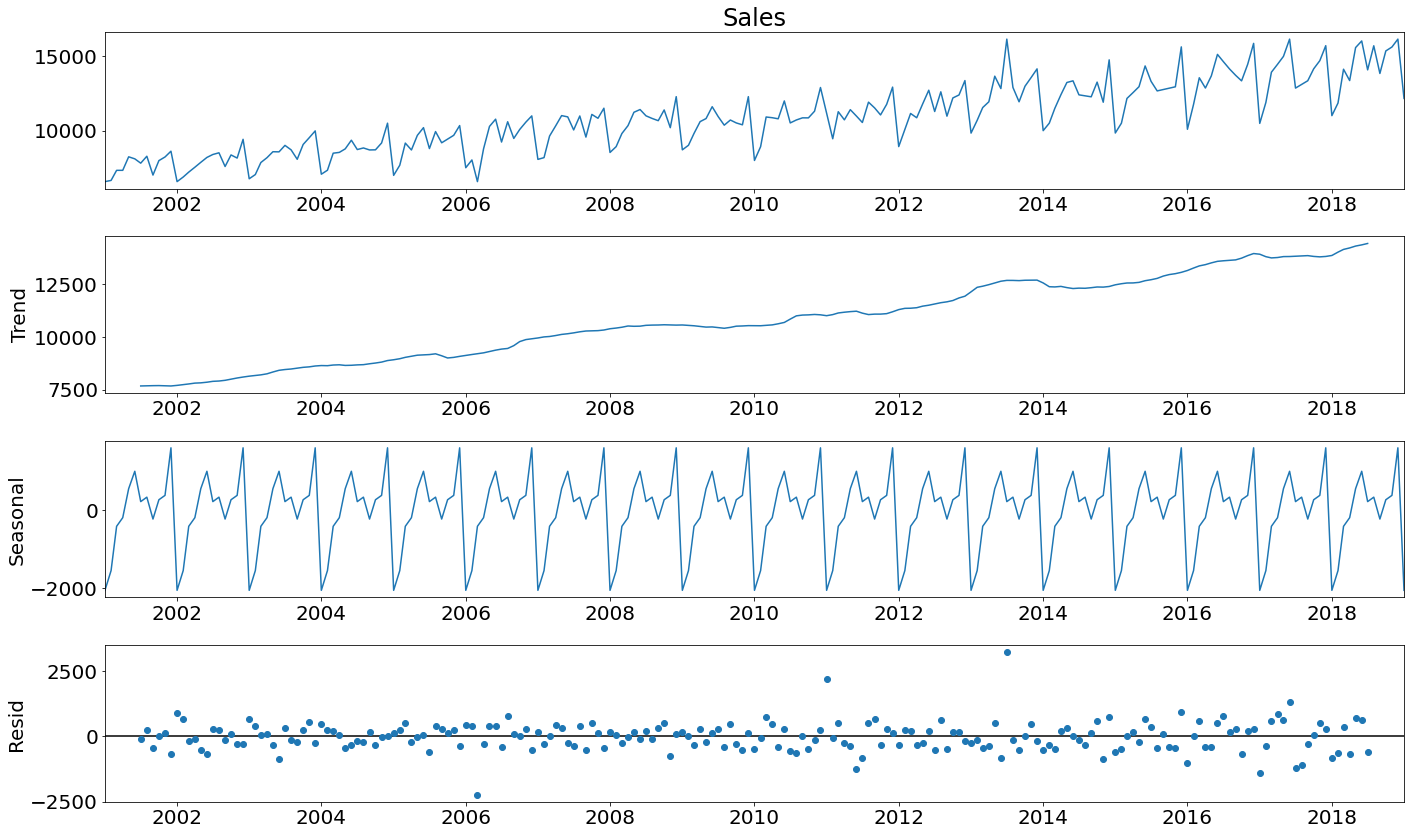

In [27]:
plt.rcParams['figure.figsize'] = (20, 12)

model.plot();


<AxesSubplot:xlabel='DATE'>

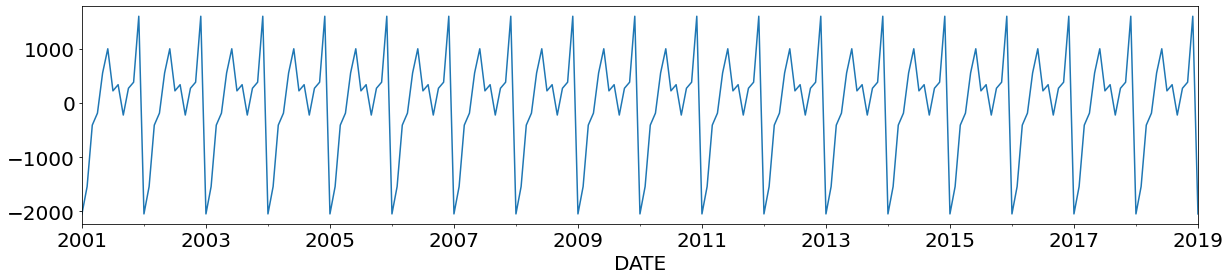

In [28]:
plt.rcParams['figure.figsize'] = (20, 4)
model.seasonal.plot()

<AxesSubplot:xlabel='DATE'>

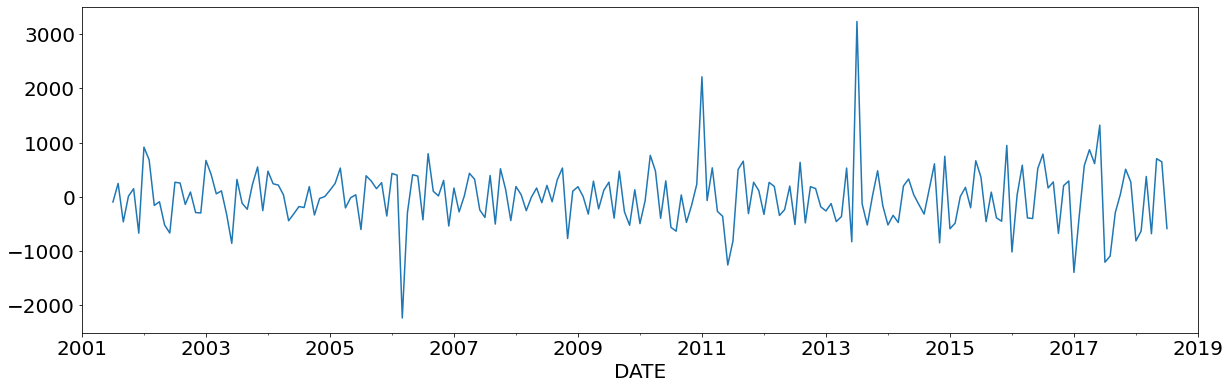

In [31]:
plt.rcParams['figure.figsize'] = (20, 6)
model.resid.plot()

In [32]:
Dickey_Fuller_test(model.resid.dropna(),significances_level = 0.05)

Time Series is Stationary
P_value is:  3.7134101382154216e-08


In [ ]:
# residuals are stationary

------------

<AxesSubplot:xlabel='DATE'>

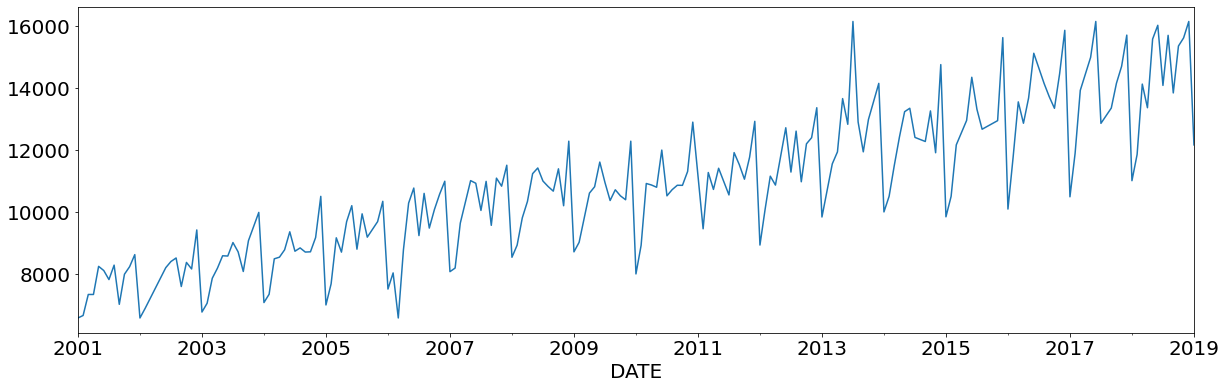

In [36]:
mobile_sales.Sales.plot()

In [37]:
Dickey_Fuller_test(mobile_sales.Sales)

Time Series is NOT Stationary
P_value is:  0.9786335779042278


<AxesSubplot:xlabel='DATE'>

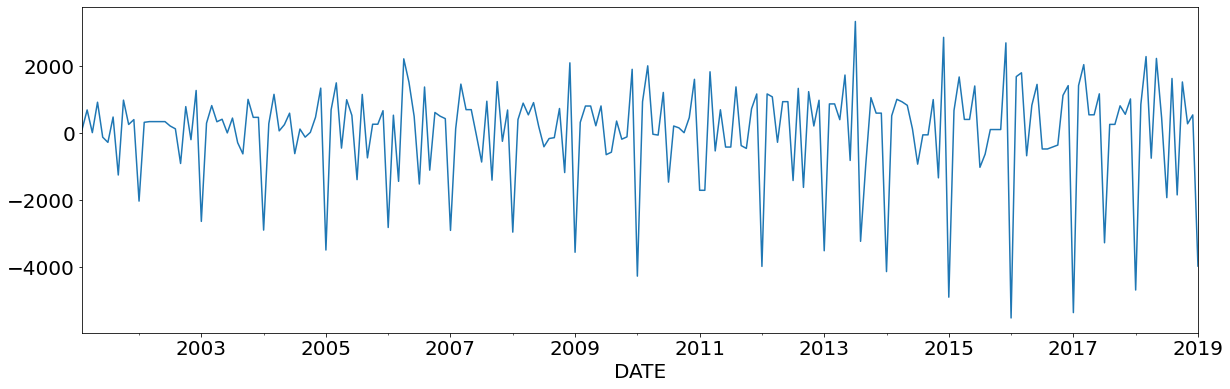

In [43]:
# differentiation of time series 
mobile_sales.Sales.diff().dropna().plot()


In [42]:
Dickey_Fuller_test(mobile_sales.Sales.diff().dropna())

Time Series is Stationary
P_value is:  1.0038630872312617e-16


<AxesSubplot:xlabel='DATE'>

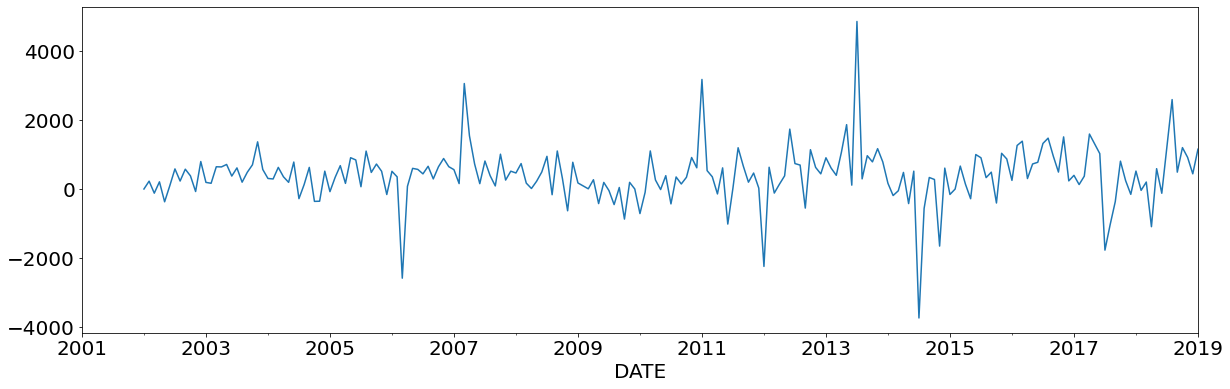

In [51]:
# seasonal differentiation of TS 
# de-seasoned TS
mobile_sales.Sales.diff(12).plot()


In [52]:
Dickey_Fuller_test(mobile_sales.Sales.diff(12).dropna())

Time Series is Stationary
P_value is:  3.204073010542101e-07


### Use of Auto-correlation : 
### How can we detect the period of seasonality using Auto-Correlation :

## Auto-correlation

In [86]:
present = mobile_sales.Sales[:-1]

In [87]:
past = mobile_sales.Sales.shift(-1)[:-1]


In [88]:
present.head()

DATE
2001-01-01    6573.36
2001-02-01    6654.00
2001-03-01    7332.00
2001-04-01    7332.00
2001-05-01    8240.00
Name: Sales, dtype: float64

In [89]:
past.head()

DATE
2001-01-01    6654.0
2001-02-01    7332.0
2001-03-01    7332.0
2001-04-01    8240.0
2001-05-01    8104.0
Name: Sales, dtype: float64

In [90]:
np.corrcoef(present,past)


array([[1.        , 0.79748607],
       [0.79748607, 1.        ]])

In [83]:
# 0.7974 is the correlation , between future and present values

In [98]:
present = mobile_sales.Sales[:-12]
past = mobile_sales.Sales.shift(-12)[:-12]
np.corrcoef(present,past)


array([[1.        , 0.93452699],
       [0.93452699, 1.        ]])

In [101]:
np.corrcoef(present,past)[0][-1]

0.9345269854939392

In [104]:
correlations = []
for lag in range(1,36):
    present = mobile_sales.Sales[:-lag]
    past = mobile_sales.Sales.shift(-lag)[:-lag]
    corrs = np.corrcoef(present,past)[0][-1]
    print(corrs)
    correlations.append(corrs)


0.7974860661369779
0.7415743529029631
0.7241765823939108
0.717634802285343
0.7353644817001721
0.7890105553976016
0.7230081812553393
0.7043985690089325
0.7041272032592011
0.7002981716003844
0.7804297905306361
0.9345269854939392
0.7571782332282511
0.7110619946934471
0.6836429676821068
0.677524582175136
0.7139512901217141
0.7521679609779462
0.6873787656118754
0.6826605095463903
0.6663705956619103
0.6806120431209901
0.7649938428239481
0.9179924729920567
0.7303886241039367
0.6813658413097418
0.6493689879078951
0.659662766169608
0.6828768942649165
0.7280837627592401
0.6695213626474041
0.6600206626637894
0.6200067358415148
0.6601911348199336
0.7387194122552819


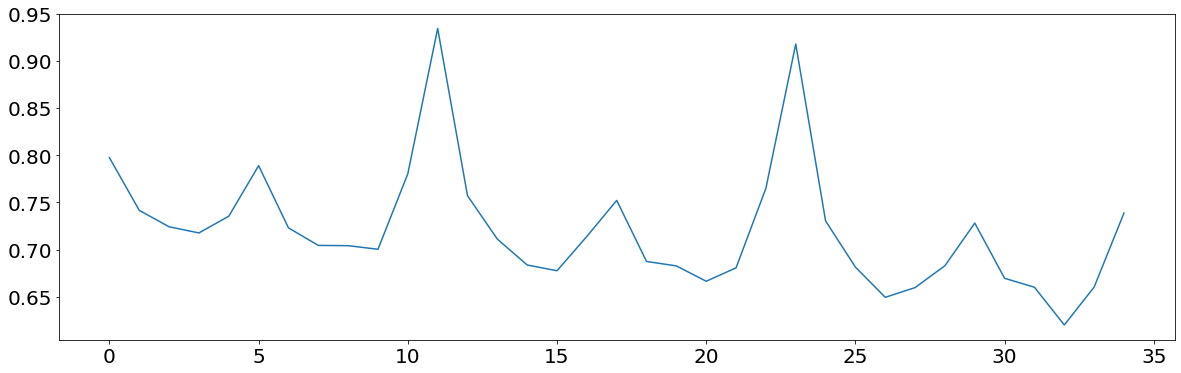

In [106]:
plt.plot(correlations)

<StemContainer object of 3 artists>

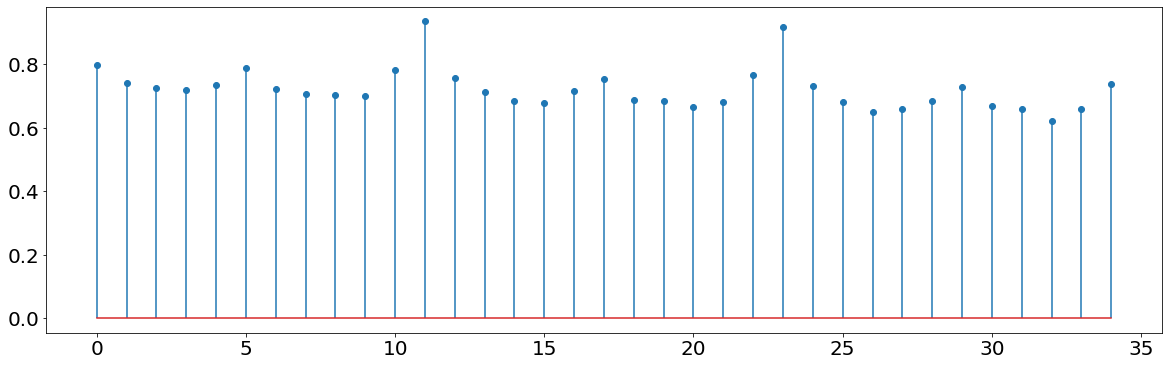

In [107]:
plt.stem(correlations)

In [108]:
# Thats how we know the period of time series 
# From above stem plot , we can observe , 
# that TS doent just have yearly but also half-yearly seasonality also 

#### Using Statsmodel :

In [110]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

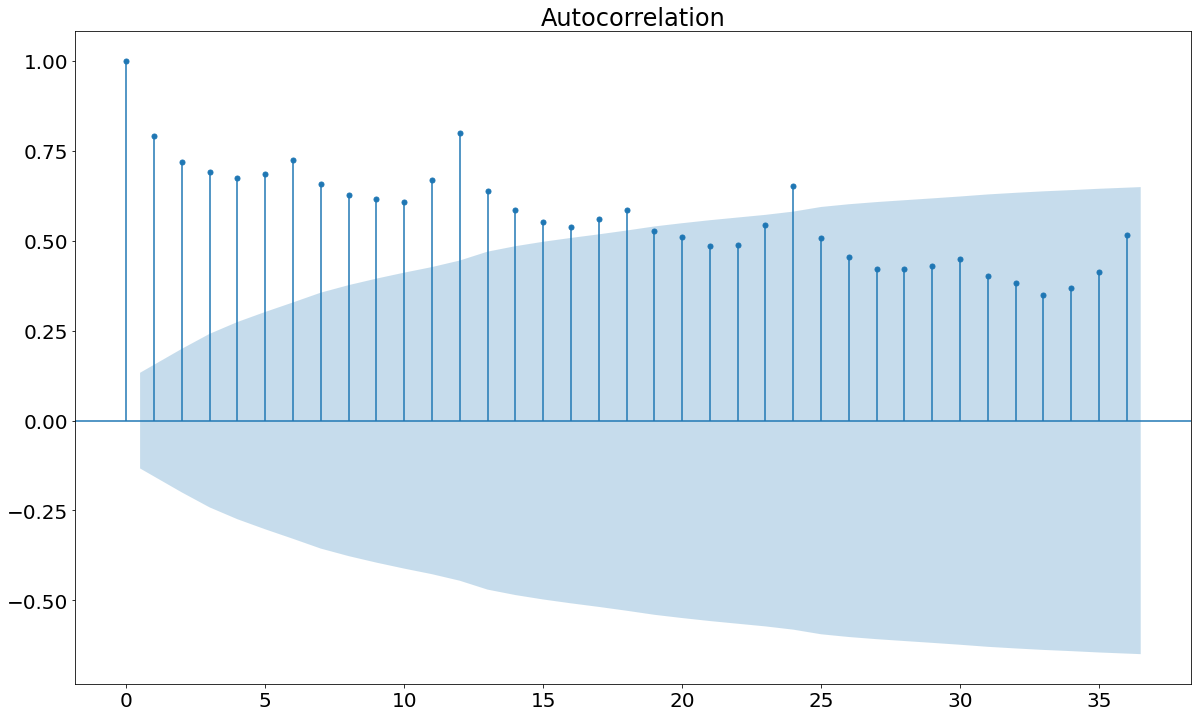

In [116]:
plt.rcParams['figure.figsize'] = (20, 12)
plot_acf(mobile_sales.Sales,lags=36);

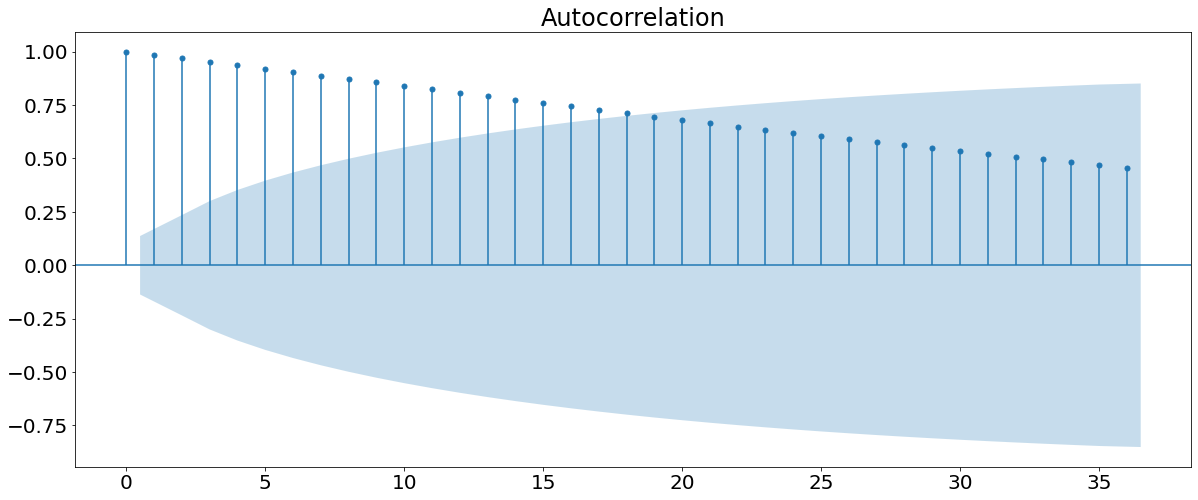

In [122]:
plt.rcParams['figure.figsize'] = (20, 8)
plot_acf(model.trend.dropna(),lags=36);

# deceasing trend 

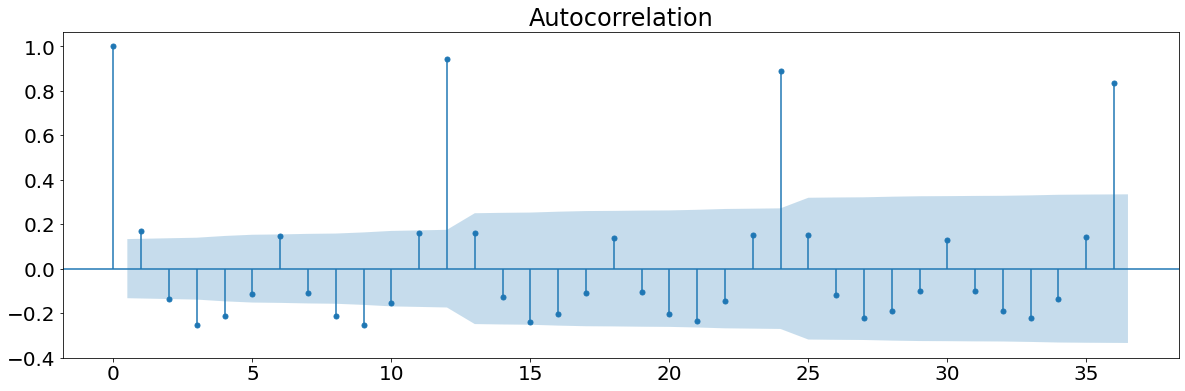

In [121]:
plt.rcParams['figure.figsize'] = (20, 6)
plot_acf(model.seasonal,lags=36);

# seasonality  

In [ ]:
# Partial Autocorrelation eliminates the indirect correlations that happens through the lags 

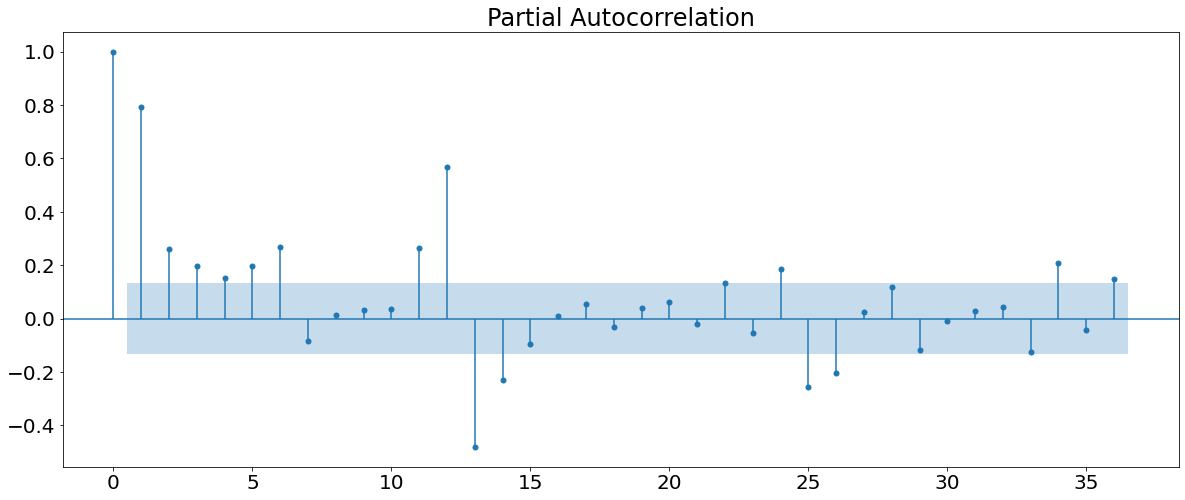

In [127]:
plot_pacf(mobile_sales.Sales,lags=36);

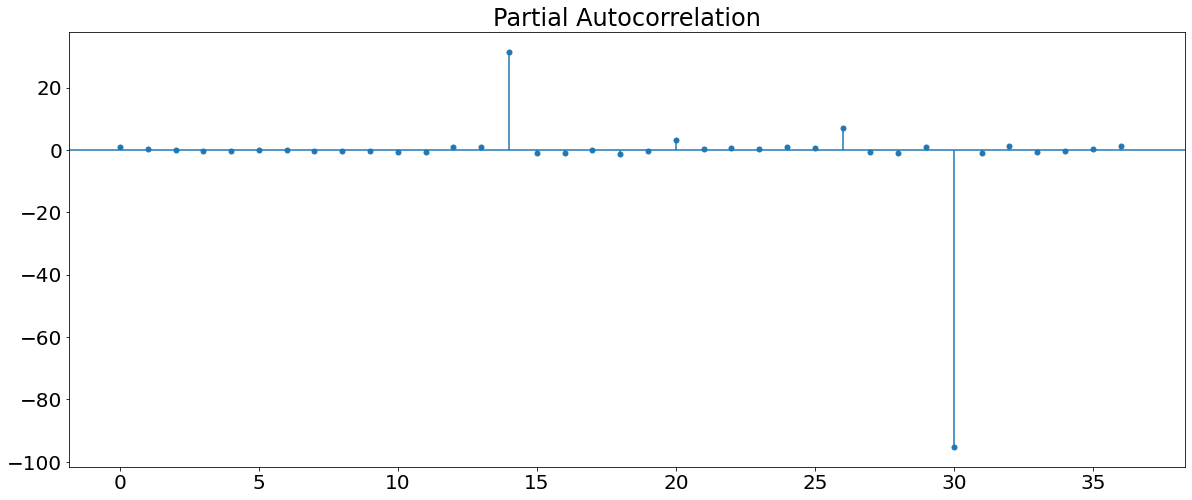

In [125]:
plot_pacf(model.seasonal,lags=36);

    Revision: 
    
        
        In additive: (Holt-winter method)
            Simple Exponential Smoothing : Level of series
            Double Exponential Smoothing : level + (growth*steps)   # increasing straight line without seasonality
            Triple Exponential Smoothing : Level + (growth*steps) + level of seasonal 
    
    
    Stationarity : 
                signla who's properties are not preditively changing
                (doesnt have trend and seasonality)
    
    
     acf- pacf plots : 
         autocorrelation that helps us find the trend and priod of reasonality 
                

-  ###  Q:  The number of smoothing constants used in the smoothing method of forecasting which considers seasonality in addition to trend is:


        
        Three constants are used

        Explanation:
        In the method triple exponential smoothing we can use constants for adjusting forecast error for

        previous observation(alpha)
        trend(beta) and,
        seasonality(gamma).
